***
$\mathbf{\text{Gradient Tree Boosting Algorithm}}$<br>
***
1.&emsp;Initialize model with a constant value $$f_{0}(x) = \textrm{arg min}_{\gamma} \sum \limits _{i=1} ^{N} L(y_{i}, \gamma)$$

2.&emsp;For m = 1 to M:<br>
&emsp;&emsp;(a)&emsp;For $i = 1,2,...,N$ compute<br>
$$r_{im} = - \displaystyle \Bigg[\frac{\partial L(y_{i}, f(x_{i}))}{\partial f(x_{i})}\Bigg]_{f=f_{m−1}}$$

&emsp;&emsp;(b)&emsp;Fit a regression tree to the targets $r_{im}$ giving terminal regions<br>
&emsp;&emsp;&emsp;&emsp;$R_{jm}, j = 1, 2, . . . , J_{m}.$<br><br>
&emsp;&emsp;(c)&emsp;For $j = 1, 2, . . . , J_{m}$ compute<br>
$$\gamma_{jm} = \underset{\gamma}{\textrm{arg min}} \sum \limits _{x_{i} \in R_{jm}} L(y_{i}, f_{m−1}(x_{i}) + \gamma)$$
<br>
&emsp;&emsp;(d)&emsp;Update $f_{m}(x) = f_{m−1}(x) + \sum _{j=1} ^{J_{m}} \gamma_{jm} I(x \in R_{jm})$<br><br>
3. Output $\hat{f}(x) = f_{M}(x)$
***

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
import ipywidgets as widgets
from IPython.display import HTML

In [41]:
df1 = pd.read_csv('../content/Salary_Data.csv')

In [42]:
df1.rename(columns={'YearsExperience': 'Exp(X)','Salary':'Salary(y)'},inplace=True)
df1.head()

,Exp(X),Salary(y)
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
# Step 1: Initialize model with a constant value

df1['f0(x)'] = df1['Salary(y)'].mean()
df1.head()


,Exp(X),Salary(y),f0(x)
0,1.1,39343.0,76003.0
1,1.3,46205.0,76003.0
2,1.5,37731.0,76003.0
3,2.0,43525.0,76003.0
4,2.2,39891.0,76003.0


In [44]:
# Step 2 (a): Calculate the psuedo residuals

df1['r0'] = df1['Salary(y)']-df1['f0(x)']
df1.head()

,Exp(X),Salary(y),f0(x),r0
0,1.1,39343.0,76003.0,-36660.0
1,1.3,46205.0,76003.0,-29798.0
2,1.5,37731.0,76003.0,-38272.0
3,2.0,43525.0,76003.0,-32478.0
4,2.2,39891.0,76003.0,-36112.0


[Text(0.5, 0.8333333333333334, 'x[0] <= 5.2\nsquared_error = 726499261.733\nsamples = 30\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 2.55\nsquared_error = 88456323.003\nsamples = 17\nvalue = -21432.765'),
 Text(0.125, 0.16666666666666666, 'squared_error = 9510987.2\nsamples = 5\nvalue = -34664.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 18012887.021\nsamples = 12\nvalue = -15919.75'),
 Text(0.75, 0.5, 'x[0] <= 8.05\nsquared_error = 174618515.941\nsamples = 13\nvalue = 28027.462'),
 Text(0.625, 0.16666666666666666, 'squared_error = 53566814.556\nsamples = 6\nvalue = 15614.333'),
 Text(0.875, 0.16666666666666666, 'squared_error = 33097757.061\nsamples = 7\nvalue = 38667.286')]

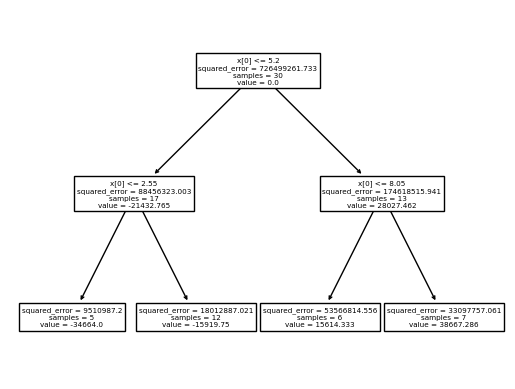

In [45]:
# Step 2 (b): Fit the regression Decision Tree with Input(X) and r1 pseudo residuals as target values and get the terminal regions/leaf nodes

dt = DecisionTreeRegressor(max_depth=2)
dt.fit(df1[['Exp(X)']],df1[['r0']])

plot_tree(dt)

In [46]:
df1['f1(x)'] = df1['f0(x)'] + 0.4 * dt.predict(df1[['Exp(X)']])
df1.head()

,Exp(X),Salary(y),f0(x),r0,f1(x)
0,1.1,39343.0,76003.0,-36660.0,62137.4
1,1.3,46205.0,76003.0,-29798.0,62137.4
2,1.5,37731.0,76003.0,-38272.0,62137.4
3,2.0,43525.0,76003.0,-32478.0,62137.4
4,2.2,39891.0,76003.0,-36112.0,62137.4


In [47]:
df1['r1'] = df1['Salary(y)']-df1['f1(x)']
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(df1[['Exp(X)']],df1[['r1']])
df1['f2(x)'] = df1['f1(x)'] + 0.4 * dt1.predict(df1[['Exp(X)']])
df1.head()

,Exp(X),Salary(y),f0(x),r0,f1(x),r1,f2(x)
0,1.1,39343.0,76003.0,-36660.0,62137.4,-22794.4,53818.04
1,1.3,46205.0,76003.0,-29798.0,62137.4,-15932.4,53818.04
2,1.5,37731.0,76003.0,-38272.0,62137.4,-24406.4,53818.04
3,2.0,43525.0,76003.0,-32478.0,62137.4,-18612.4,53818.04
4,2.2,39891.0,76003.0,-36112.0,62137.4,-22246.4,53818.04


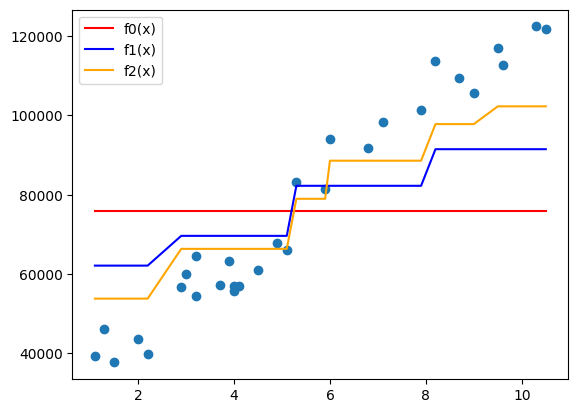

In [48]:
plt.scatter(df1['Exp(X)'],df1['Salary(y)'])
plt.plot(df1['Exp(X)'],df1['f0(x)'],color='red',label='f0(x)')
plt.plot(df1['Exp(X)'],df1['f1(x)'],color='blue',label='f1(x)')
plt.plot(df1['Exp(X)'],df1['f2(x)'],color='orange',label='f2(x)')
plt.legend()
plt.show()

### **Demostrates for the model fits the data and tries to find the relationship between X & Y**

In [49]:
counter=0
n_estimators=20
max_depth=2
learning_rate=0.4
target = np.array(df1['Salary(y)'].values).reshape(1,-1)
residual=np.zeros(df1['Salary(y)'].shape[0],dtype=int).reshape(1,-1)
weak_learner=np.zeros(df1['Salary(y)'].shape[0],dtype=int).reshape(1,-1)
loss = np.zeros(df1['Salary(y)'].shape[0],dtype=int).reshape(1,-1)

for i in range(n_estimators):
  if i==0:
    baselearner = df1['Salary(y)'].mean()
    weak_learner = weak_learner + baselearner
    residual = target - weak_learner
    loss = loss + residual**2
  elif i==1:
    dt = DecisionTreeRegressor(max_depth=max_depth).fit(df1[['Exp(X)']],residual.reshape(-1,1))
    weak_learner = np.append(weak_learner,weak_learner + learning_rate * dt.predict(df1[['Exp(X)']]).reshape(1,-1),axis=0)
    residual = np.append(residual,target - weak_learner[i],axis=0)
    loss = np.append(loss,residual**2,axis=0)
  else:
    dt = DecisionTreeRegressor(max_depth=max_depth).fit(df1[['Exp(X)']],residual[i-1].reshape(-1,1))
    weak_learner = np.append(weak_learner,weak_learner[i-1] + learning_rate * dt.predict(df1[['Exp(X)']]).reshape(1,-1),axis=0)
    residual = np.append(residual,target - weak_learner[i],axis=0)
    loss = np.append(loss,residual**2,axis=0)


def plot_gb(i=0):
  print(f'Decision Trees: {i}')
  plt.scatter(df1['Exp(X)'],df1['Salary(y)'])
  plt.plot(df1['Exp(X)'],weak_learner[i],color='red')
  plt.xlabel('Exp(X)')
  plt.ylabel('Salary(y)')
  plt.show()

display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))
widgets.interact(plot_gb, i=widgets.Play(min=0,max=19,step=1,interval=1700))

interactive(children=(Play(value=0, description='i', interval=1700, max=19), Output()), _dom_classes=('widget-…

<function __main__.plot_gb(i=0)>

### **Demonstrate how the reduction of pseudo residual effect the overal loss**

In [50]:

def plot_loss(i=0):
  print(f'                                    Model: {i}')
  #plt.scatter(df1['Exp(X)'],df1['Salary(y)'])
  plt.scatter(residual[i],loss[i],color='red')
  plt.ylabel('Loss Function L(y,f(x))')
  plt.xlabel('y-fm(x)')
  plt.ylim(0,9000000000)
  plt.xlim(-50000,50000)
  plt.show()

display(HTML('''<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"> '''))
widgets.interact(plot_loss, i=widgets.Play(min=0,max=19,step=1,interval=800))


interactive(children=(Play(value=0, description='i', interval=800, max=19), Output()), _dom_classes=('widget-i…

<function __main__.plot_loss(i=0)>

In [51]:
#gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.4,max_depth=2,criterion='squared_error',n_estimators=15)
#gbr = GradientBoostingRegressor()
#gbr.fit(X,Y)
#Y_pred = gbr.predict(X)

#plt.scatter(X,Y)
#plt.plot(X,Y_pred,color='red')
#plt.show()